In [5]:
import pandas as pd
import sqlite3

### Loading data

In [2]:
orders = pd.read_csv("..//EDA/orders.csv")

In [3]:
orders

,order_id,user_id,restaurant_id,order_date,total_amount,restaurant_name
0,1,2508,450,18-02-2023,842.97,New Foods Chinese
1,2,2693,309,18-01-2023,546.68,Ruchi Curry House Multicuisine
2,3,2084,107,15-07-2023,163.93,Spice Kitchen Punjabi
3,4,319,224,04-10-2023,1155.97,Darbar Kitchen Non-Veg
4,5,1064,293,25-12-2023,1321.91,Royal Eatery South Indian
...,...,...,...,...,...,...
9995,9996,2528,249,21-05-2023,1211.96,Royal Kitchen North Indian
9996,9997,2867,267,06-08-2023,1188.05,Darbar Cafe Punjabi
9997,9998,522,420,11-11-2023,979.44,Ruchi Tiffins Chinese
9998,9999,319,492,08-09-2023,1105.93,Swagath Kitchen North Indian


In [12]:
users = pd.read_json("users.json")
users

,user_id,name,city,membership
0,1,User_1,Chennai,Regular
1,2,User_2,Pune,Gold
2,3,User_3,Bangalore,Gold
3,4,User_4,Bangalore,Regular
4,5,User_5,Pune,Gold
...,...,...,...,...
2995,2996,User_2996,Hyderabad,Gold
2996,2997,User_2997,Hyderabad,Regular
2997,2998,User_2998,Bangalore,Regular
2998,2999,User_2999,Pune,Regular


In [6]:
conn = sqlite3.connect(":memory:")
with open("restaurants.sql", "r") as f:
    conn.executescript(f.read())
restaurants = pd.read_sql("SELECT * FROM restaurants", conn)

In [7]:
conn

## Merging orders + Users 

In [10]:
orders_users = pd.merge(
    orders,
    users,
    on="user_id",
    how="left"
)

In [11]:
orders_users

,order_id,user_id,restaurant_id,order_date,total_amount,restaurant_name,name,city,membership
0,1,2508,450,18-02-2023,842.97,New Foods Chinese,User_2508,Hyderabad,Regular
1,2,2693,309,18-01-2023,546.68,Ruchi Curry House Multicuisine,User_2693,Pune,Regular
2,3,2084,107,15-07-2023,163.93,Spice Kitchen Punjabi,User_2084,Chennai,Gold
3,4,319,224,04-10-2023,1155.97,Darbar Kitchen Non-Veg,User_319,Bangalore,Gold
4,5,1064,293,25-12-2023,1321.91,Royal Eatery South Indian,User_1064,Pune,Regular
...,...,...,...,...,...,...,...,...,...
9995,9996,2528,249,21-05-2023,1211.96,Royal Kitchen North Indian,User_2528,Hyderabad,Gold
9996,9997,2867,267,06-08-2023,1188.05,Darbar Cafe Punjabi,User_2867,Bangalore,Regular
9997,9998,522,420,11-11-2023,979.44,Ruchi Tiffins Chinese,User_522,Bangalore,Gold
9998,9999,319,492,08-09-2023,1105.93,Swagath Kitchen North Indian,User_319,Bangalore,Gold


### Adding restraunts 

In [13]:
final_df = pd.merge(
    orders_users,
    restaurants,
    on="restaurant_id",
    how="left"
)

### Final_df 

In [14]:
final_df

,order_id,user_id,restaurant_id,order_date,total_amount,restaurant_name_x,name,city,membership,restaurant_name_y,cuisine,rating
0,1,2508,450,18-02-2023,842.97,New Foods Chinese,User_2508,Hyderabad,Regular,Restaurant_450,Mexican,3.2
1,2,2693,309,18-01-2023,546.68,Ruchi Curry House Multicuisine,User_2693,Pune,Regular,Restaurant_309,Indian,4.5
2,3,2084,107,15-07-2023,163.93,Spice Kitchen Punjabi,User_2084,Chennai,Gold,Restaurant_107,Mexican,4.0
3,4,319,224,04-10-2023,1155.97,Darbar Kitchen Non-Veg,User_319,Bangalore,Gold,Restaurant_224,Chinese,4.8
4,5,1064,293,25-12-2023,1321.91,Royal Eatery South Indian,User_1064,Pune,Regular,Restaurant_293,Italian,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,2528,249,21-05-2023,1211.96,Royal Kitchen North Indian,User_2528,Hyderabad,Gold,Restaurant_249,Italian,4.7
9996,9997,2867,267,06-08-2023,1188.05,Darbar Cafe Punjabi,User_2867,Bangalore,Regular,Restaurant_267,Chinese,4.2
9997,9998,522,420,11-11-2023,979.44,Ruchi Tiffins Chinese,User_522,Bangalore,Gold,Restaurant_420,Italian,4.0
9998,9999,319,492,08-09-2023,1105.93,Swagath Kitchen North Indian,User_319,Bangalore,Gold,Restaurant_492,Italian,4.0


In [16]:
final_df.to_csv("final_food_delivery_dataset.csv", index=False)

## Understanding the final_dataset

In [17]:
final_df.shape

(10000, 12)

In [19]:
final_df.columns

Index(['order_id', 'user_id', 'restaurant_id', 'order_date', 'total_amount',
       'restaurant_name_x', 'name', 'city', 'membership', 'restaurant_name_y',
       'cuisine', 'rating'],
      dtype='object')

In [25]:
final_df.describe()

,order_id,user_id,restaurant_id,total_amount,rating
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1504.117700,251.016700,801.162412,4.045430
std,2886.89568,861.727776,144.622558,405.458753,0.606531
min,1.00000,1.000000,1.000000,100.200000,3.000000
25%,2500.75000,761.000000,127.000000,446.310000,3.500000
50%,5000.50000,1508.000000,251.000000,806.295000,4.100000
75%,7500.25000,2250.250000,376.000000,1149.227500,4.600000
max,10000.00000,3000.000000,500.000000,1499.830000,5.000000


In [15]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   order_id           10000 non-null  int64  
 1   user_id            10000 non-null  int64  
 2   restaurant_id      10000 non-null  int64  
 3   order_date         10000 non-null  object 
 4   total_amount       10000 non-null  float64
 5   restaurant_name_x  10000 non-null  object 
 6   name               10000 non-null  object 
 7   city               10000 non-null  object 
 8   membership         10000 non-null  object 
 9   restaurant_name_y  10000 non-null  object 
 10  cuisine            10000 non-null  object 
 11  rating             10000 non-null  float64
dtypes: float64(2), int64(3), object(7)
memory usage: 937.6+ KB


##### Observation
- Each row represents a single food order placed by a user
- The dataset contains transactional details, user information, and restaurant attributes
- Key identifiers include order_id, user_id, and restaurant_id
- The data includes both numerical and categorical variables

### Data Cleaning

In [22]:
final_df.isnull().sum()

order_id             0
user_id              0
restaurant_id        0
order_date           0
total_amount         0
restaurant_name_x    0
name                 0
city                 0
membership           0
restaurant_name_y    0
cuisine              0
rating               0
dtype: int64

In [24]:
final_df.duplicated().sum()

0

In [27]:
final_df['membership'].value_counts()

membership
Regular    5013
Gold       4987
Name: count, dtype: int64

In [31]:
final_df['membership'].value_counts(normalize=True) * 100

membership
Regular    50.13
Gold       49.87
Name: proportion, dtype: float64

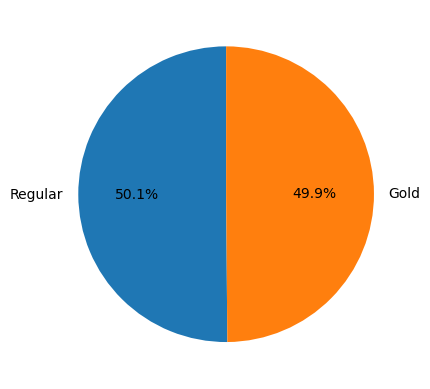

In [33]:
final_df['membership'].value_counts().plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=90
)
plt.ylabel('')
plt.show()

##### Observations
- Data loaded from CSV, JSON, and SQL sources and merged using left joins
- Dataset structure and data types were reviewed
- Missing values checked; no critical nulls found in key identifier columns
- Null values from joins were retained to preserve all order records
- Date columns converted to datetime format
- Categorical columns reviewed for consistency and balance
- No duplicate order records observed

## EDA

### Univariate Analysis 
Univariate analysis was performed to understand the distribution and frequency of individual variables such as order amount, city, membership type, and cuisine.

*This analysis helps identify overall patterns and dominant categories within the dataset.*


##### Distribution of Order Amount 

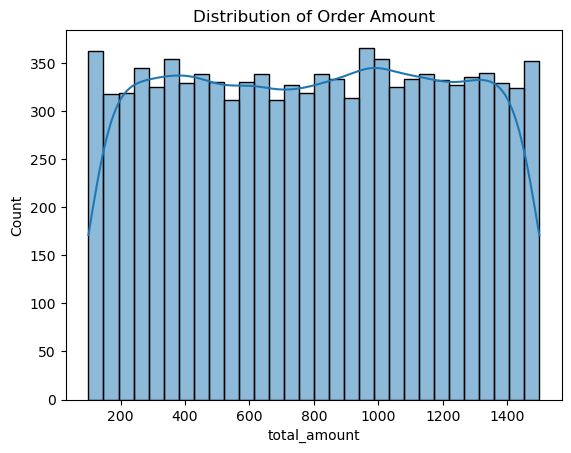

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(final_df['total_amount'], bins=30, kde=True)
plt.title("Distribution of Order Amount")
plt.show()


##### Membership Distribution 

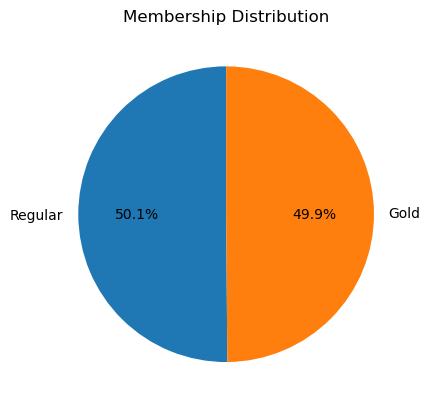

In [37]:
final_df['membership'].value_counts()

final_df['membership'].value_counts().plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=90
)
plt.ylabel('')
plt.title("Membership Distribution")
plt.show()


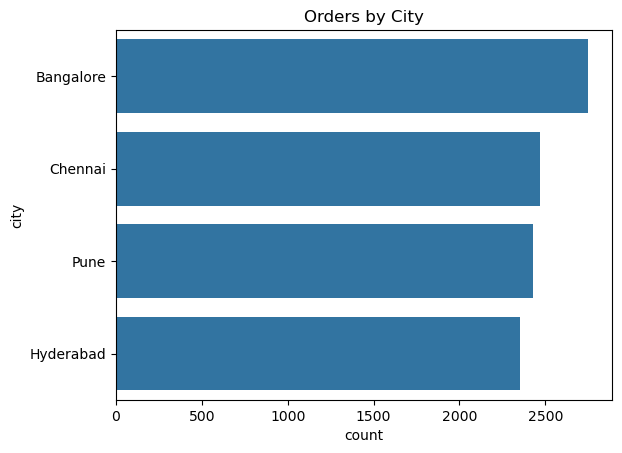

In [38]:
sns.countplot(
    data=final_df,
    y='city',
    order=final_df['city'].value_counts().index
)
plt.title("Orders by City")
plt.show()


##### Orders by City

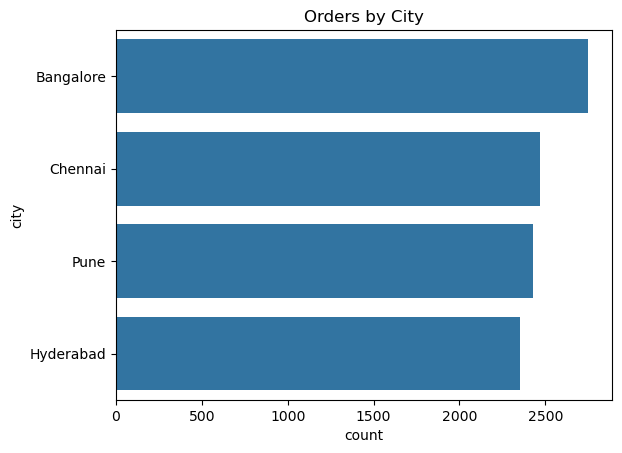

In [39]:
sns.countplot(
    data=final_df,
    y='city',
    order=final_df['city'].value_counts().index
)
plt.title("Orders by City")
plt.show()

### Bivariate Analysis
Bivariate analysis was conducted to examine relationships between key variables such as membership type and order value, city and revenue, and cuisine popularity.

*These comparisons provide insights into how different factors influence order behavior and revenue contribution.*


##### Membership vs Order Amount 

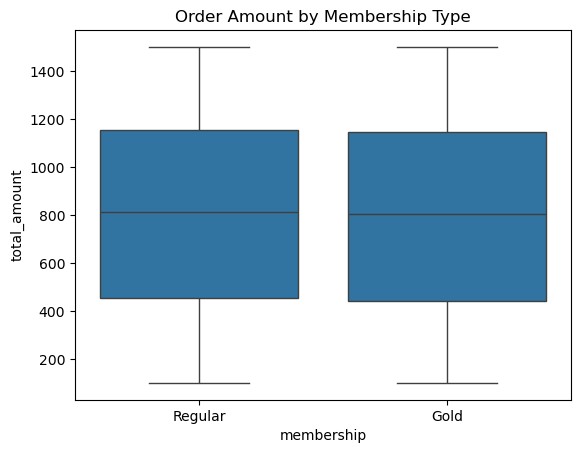

In [40]:
sns.boxplot(
    data=final_df,
    x='membership',
    y='total_amount'
)
plt.title("Order Amount by Membership Type")
plt.show()

### City vs Total Revenue

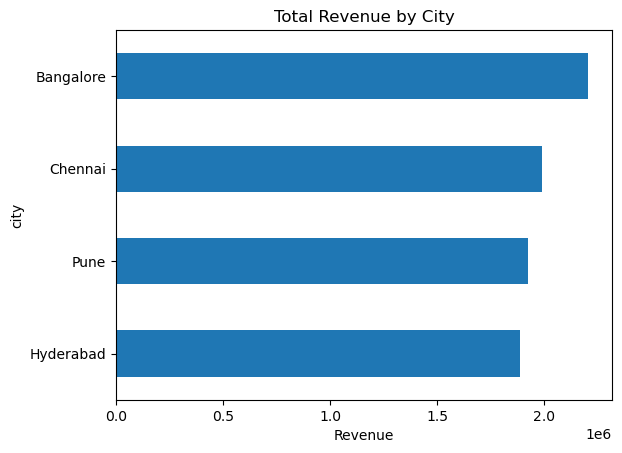

In [42]:
city_revenue = final_df.groupby('city')['total_amount'].sum().sort_values()

city_revenue.plot(kind='barh')
plt.title("Total Revenue by City")
plt.xlabel("Revenue")
plt.show()

##### Cuisine vs Number of Orders

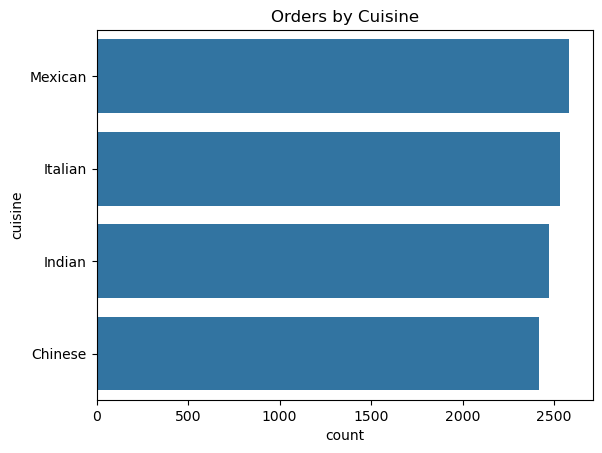

In [43]:
sns.countplot(
    data=final_df,
    y='cuisine',
    order=final_df['cuisine'].value_counts().index
)
plt.title("Orders by Cuisine")
plt.show()


In [48]:
final_df['order_date'] = pd.to_datetime(final_df['order_date'], errors='coerce')

C:\Users\SAMI\AppData\Local\Temp\ipykernel_22488\1145811791.py:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  final_df['order_date'] = pd.to_datetime(final_df['order_date'], errors='coerce')


## Time-Based Analysisabs
Time-based analysis was performed by converting the order date into a datetime format and aggregating orders and revenue at a monthly level.

*This analysis helps identify trends, patterns, and potential seasonality in order volume and revenue over time.*

### Orders Over Time 

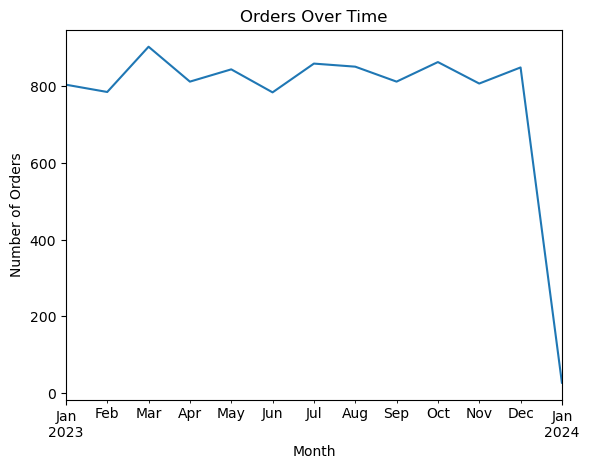

In [49]:
orders_trend = final_df.groupby(
    final_df['order_date'].dt.to_period('M')
).size()

orders_trend.plot()
plt.title("Orders Over Time")
plt.xlabel("Month")
plt.ylabel("Number of Orders")
plt.show()

### Revenue Over Time 

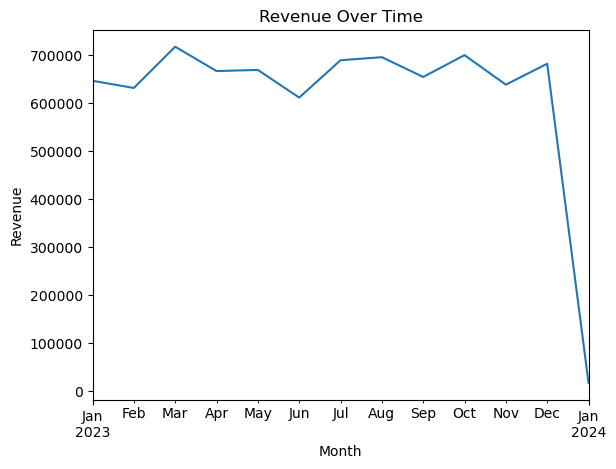

In [50]:
revenue_trend = final_df.groupby(
    final_df['order_date'].dt.to_period('M')
)['total_amount'].sum()

revenue_trend.plot()
plt.title("Revenue Over Time")
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.show()


In [51]:
final_df['order_date'].dtype

dtype('<M8[ns]')

### Multivariate Analysis
Multivariate analysis was performed to examine the combined effect of multiple variables on order value and revenue.

*The results highlight how revenue distribution varies across different combinations of user segments and restaurant attributes.*


### Monthly Revenue by Membership

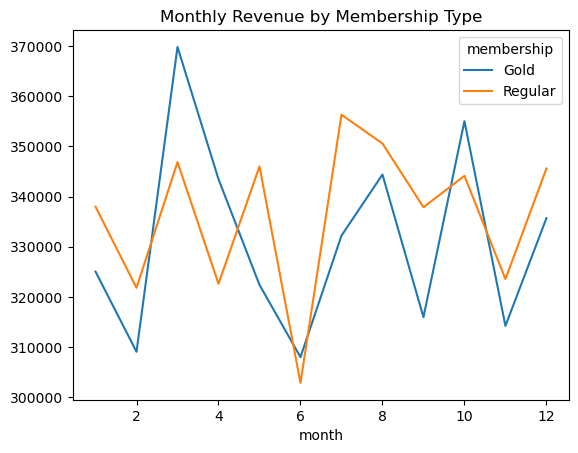

In [55]:
 final_df['month'] = final_df['order_date'].dt.month

pivot = final_df.pivot_table(
    values='total_amount',
    index='month',
    columns='membership',
    aggfunc='sum'
)

pivot.plot()
plt.title("Monthly Revenue by Membership Type")
plt.show()


### Top City–Cuisine Revenue Combos

In [53]:
final_df.groupby(['city','cuisine'])['total_amount'] \
        .sum() \
        .sort_values(ascending=False) \
        .head(10)

city       cuisine
Bangalore  Mexican    571004.61
           Italian    567881.80
           Indian     543014.04
Chennai    Mexican    534804.60
Bangalore  Chinese    525046.13
Chennai    Italian    522051.88
Pune       Indian     519241.56
Hyderabad  Mexican    500085.51
Chennai    Chinese    491710.42
Pune       Italian    482261.30
Name: total_amount, dtype: float64

### Pivot Table Analysis 
Pivot tables were used to summarize and analyze data across multiple dimensions including city, cuisine, membership type, and time.

*This approach enables efficient multivariate analysis and helps uncover hidden relationships within the dataset.*


##### Revenue by City

In [56]:
pd.pivot_table(
    final_df,
    values='total_amount',
    index='city',
    aggfunc='sum'
).sort_values(by='total_amount', ascending=False)


,total_amount
city,
Bangalore,2206946.58
Chennai,1990513.03
Pune,1924797.93
Hyderabad,1889366.58


##### Insights:
Certain cities contribute significantly higher revenue.

##### Average Order Value by Membership 

In [57]:
pd.pivot_table(
    final_df,
    values='total_amount',
    index='membership',
    aggfunc='mean'
)


,total_amount
membership,
Gold,797.145556
Regular,805.158434


##### Insiight 
Gold members have higher average order values. 

##### Orders Count by Cuisine 

In [58]:
pd.pivot_table(
    final_df,
    values='order_id',
    index='cuisine',
    aggfunc='count'
).sort_values(by='order_id', ascending=False)


,order_id
cuisine,
Mexican,2581
Italian,2532
Indian,2469
Chinese,2418


##### Insight  
Some cuisines are more popular than others.

##### City × Cuisine Revenue 

In [59]:
pd.pivot_table(
    final_df,
    values='total_amount',
    index='city',
    columns='cuisine',
    aggfunc='sum',
    fill_value=0
)


cuisine,Chinese,Indian,Italian,Mexican
city,,,,
Bangalore,525046.13,543014.04,567881.80,571004.61
Chennai,491710.42,441946.13,522051.88,534804.60
Hyderabad,470061.40,467210.85,452008.82,500085.51
Pune,443686.70,519241.56,482261.30,479608.37


##### Insight 
Cuisine performance varies across cities.

##### Monthly Revenue by Membership 

In [60]:
final_df['month'] = final_df['order_date'].dt.month

pd.pivot_table(
    final_df,
    values='total_amount',
    index='month',
    columns='membership',
    aggfunc='sum'
)


membership,Gold,Regular
month,,
1,325048.09,337972.17
2,309049.70,321817.70
3,369855.88,346883.10
4,343484.78,322612.40
5,322403.84,346024.77
6,307981.87,302841.06
7,332216.81,356342.64
8,344402.63,350584.95
9,315954.30,337883.77


##### Insight 
Revenue trends differ between membership types over time.

##### Rating v/s Revenue

In [61]:
pd.pivot_table(
    final_df,
    values='total_amount',
    index='rating',
    aggfunc='sum'
)


,total_amount
rating,
3.0,255018.13
3.1,443863.92
3.2,490913.01
3.3,288212.80
3.4,339942.79
3.5,318822.05
3.6,264193.94
3.7,368173.17
3.8,466878.69


##### Insight
Higher-rated restaurants tend to generate higher revenue.

## Final Summary
- A comprehensive exploratory data analysis was performed on the food delivery dataset
- The analysis revealed meaningful patterns in user behavior, city-wise performance, and cuisine preferences
- Membership type plays a key role in influencing order value and revenue contribution
- Time-based analysis highlights seasonal fluctuations in both order volume and revenue
- Pivot table analysis helped identify multi-dimensional relationships across city, cuisine, and membership
- The final dataset serves as a reliable source for deriving business insights and decision-making

*This project demonstrates practical experience in data integration, exploratory analysis, and insight generation using real-world datasets.*